#Importing the Necessary Libraries

In [ ]:
!pip install Keras-Preprocessing
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import spacy
import random
import joblib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, GRU, Conv1D, MaxPooling1D, Bidirectional, Flatten
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 998.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 59.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 84.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 63.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 128.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 92.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 53.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#Loading the Dataset

In [ ]:
data=pd.read_csv('/content/Language Detection.csv', engine='python')
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


#Exploratory Data Analysis(EDA)

In [ ]:
data.shape

(10436, 2)

In [ ]:
data.describe().T

,count,unique,top,freq
Text,10436,10366,Mi dispiace.,3
Language,10436,18,English,1385


In [ ]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           94
Bengali         68
Name: Language, dtype: int64

In [ ]:
data.fillna("", inplace=True)
data.isna().sum()

Text        0
Language    0
dtype: int64

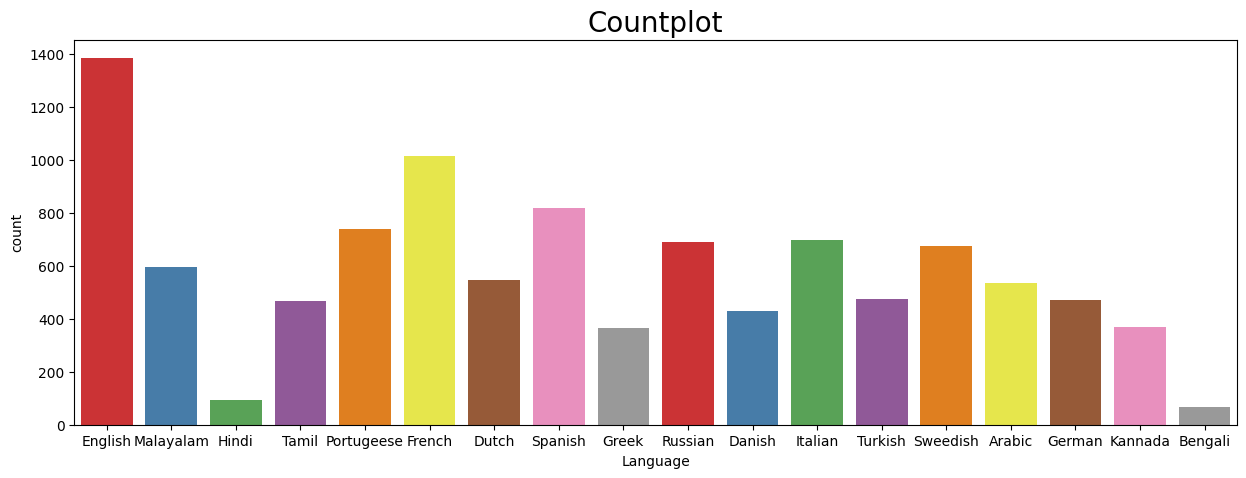

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Language',data=data,palette='Set1')
plt.title('Countplot',fontsize=20)
plt.show()

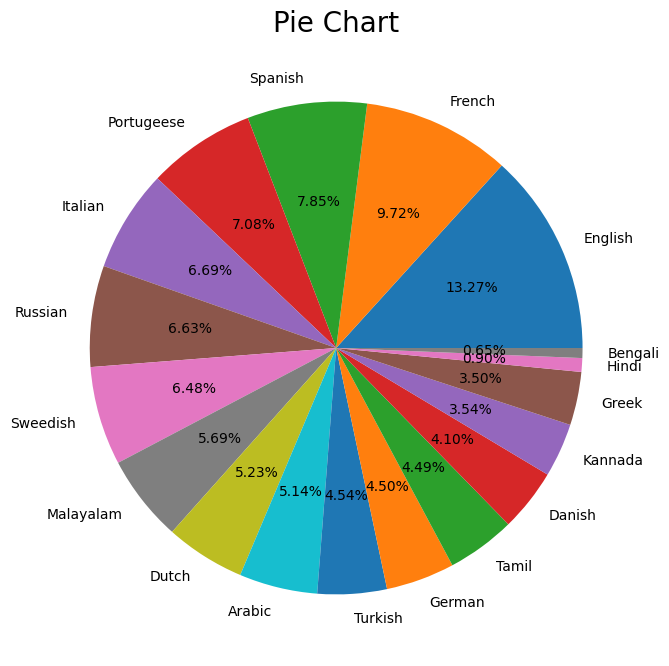

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(x = data['Language'].value_counts() ,autopct='%1.2f%%' ,labels=data['Language'].value_counts().index)
plt.title('Pie Chart',fontsize=20)
plt.show()

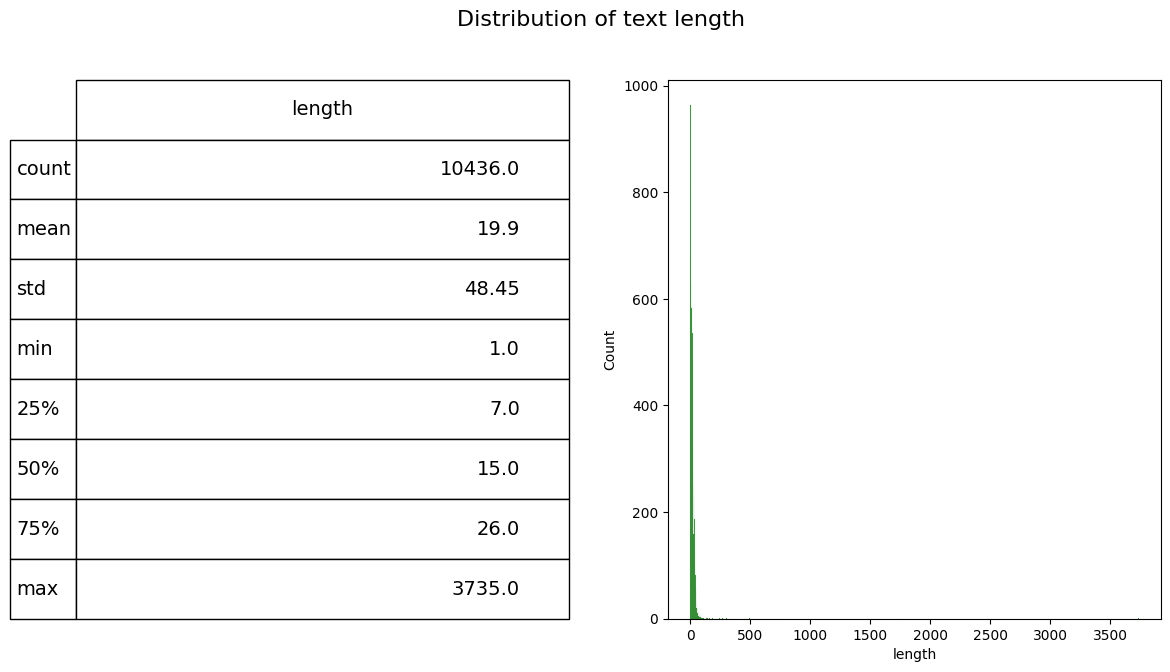

In [ ]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data['length'], ax=ax1,color='green')
describe = data.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length', fontsize=16)

plt.show()

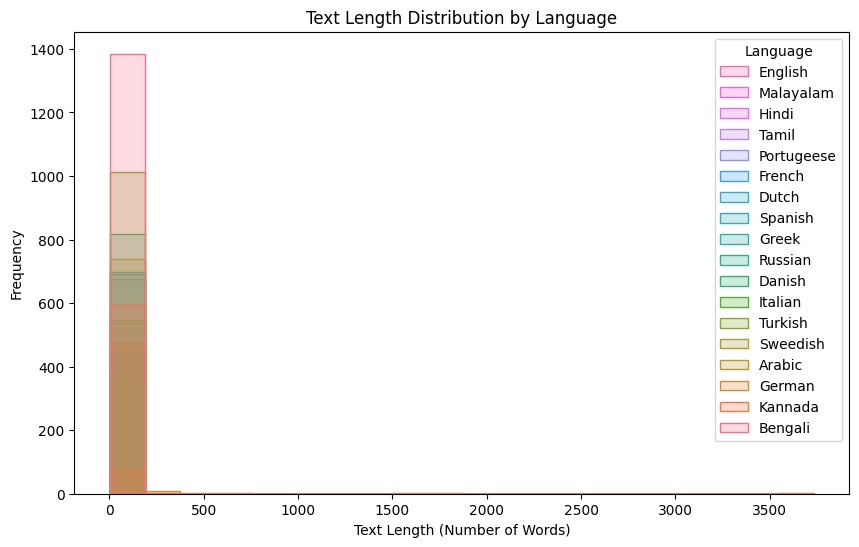

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='length', hue='Language', bins=20, element='step')
plt.title("Text Length Distribution by Language")
plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Frequency")

unique_language = data['Language'].unique()
plt.legend(title="Language", labels=unique_language)

plt.show()

In [ ]:
def get_named_entities(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    if doc.ents:
        for ent in doc.ents:
            print(ent.text , ' : ' ,  ent.label_ , ' : ' , str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

indices = random.sample(range(len(data['Text'])), 15)
X_entities = [get_named_entities(data['Text'][i]) for i in indices]

un  :  ORG  :  Companies, agencies, institutions, etc.
un  :  ORG  :  Companies, agencies, institutions, etc.
பொதுவான  :  PERSON  :  People, including fictional
சொற்றொடர்களைப்  :  CARDINAL  :  Numerals that do not fall under another type
un  :  ORG  :  Companies, agencies, institutions, etc.
carruaje dorado  :  PERSON  :  People, including fictional
66  :  CARDINAL  :  Numerals that do not fall under another type
att den rapporterats  :  PERSON  :  People, including fictional
οικονομία ήταν  :  GPE  :  Countries, cities, states
αργή φέτος ή ο αγώνας  :  ORG  :  Companies, agencies, institutions, etc.
μετά από  :  ORG  :  Companies, agencies, institutions, etc.
Tom M. Mitchell  :  PERSON  :  People, including fictional
fornito la definizione più  :  PERSON  :  People, including fictional
Machine Learning  :  WORK_OF_ART  :  Titles of books, songs, etc.
P  :  ORG  :  Companies, agencies, institutions, etc.
un  :  ORG  :  Companies, agencies, institutions, etc.
un  :  ORG  :  Companies, a

#Text Cleaning and Preprocessing

In [ ]:
def clean_text(text):
    tokens = word_tokenize(text)
    stemmer = SnowballStemmer(language='english')
    stop_words = set(stopwords.words('english'))
    clean_tokens = [stemmer.stem(token.lower()) for token in tokens if token.lower() not in stop_words]
    clean_text = ' '.join(clean_tokens)
    return clean_text

data['Text'] = data['Text'].apply(clean_text)

#Machine Learning Models

##Feature Extraction and Data Splitting

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Text'])
X = pd.DataFrame.sparse.from_spmatrix(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Language'])

label = pd.DataFrame({'language': y_encoded})

XX_train, XX_test, YY_train, YY_test = train_test_split(X , label, test_size=0.20, random_state=42)
print((XX_train.shape, YY_train.shape, XX_test.shape, YY_test.shape))

((8348, 36534), (8348, 1), (2088, 36534), (2088, 1))


In [ ]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

##Randomforest Model with Hyperparameter Tuning and Evaluation


In [ ]:
lr = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [500, 1000, 1200],
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(XX_train, YY_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'max_iter': [500, 1000, 1200]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_lr_model = grid_search.best_estimator_
y_pred1 = best_lr_model.predict(XX_test)

accuracy = accuracy_score(YY_test, y_pred1) * 100
class_names = label_encoder.classes_
classification_rep = classification_report(YY_test, y_pred1, target_names= class_names)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:\n")
print(classification_rep)

Best Hyperparameters: {'C': 10, 'max_iter': 500}
Accuracy : 94.78%
Classification Report:

              precision    recall  f1-score   support

      Arabic       1.00      0.94      0.97       110
     Bengali       1.00      0.79      0.88        14
      Danish       0.96      0.88      0.92        82
       Dutch       0.99      0.91      0.95       103
     English       0.76      1.00      0.87       286
      French       0.99      0.97      0.98       203
      German       0.99      0.94      0.97        89
       Greek       1.00      0.93      0.96        71
       Hindi       1.00      0.94      0.97        18
     Italian       0.99      0.96      0.97       138
     Kannada       1.00      0.95      0.97        76
   Malayalam       1.00      0.96      0.98       122
  Portugeese       0.98      0.93      0.96       137
     Russian       1.00      0.92      0.96       143
     Spanish       0.95      0.96      0.96       175
    Sweedish       0.98      0.91      0.94 

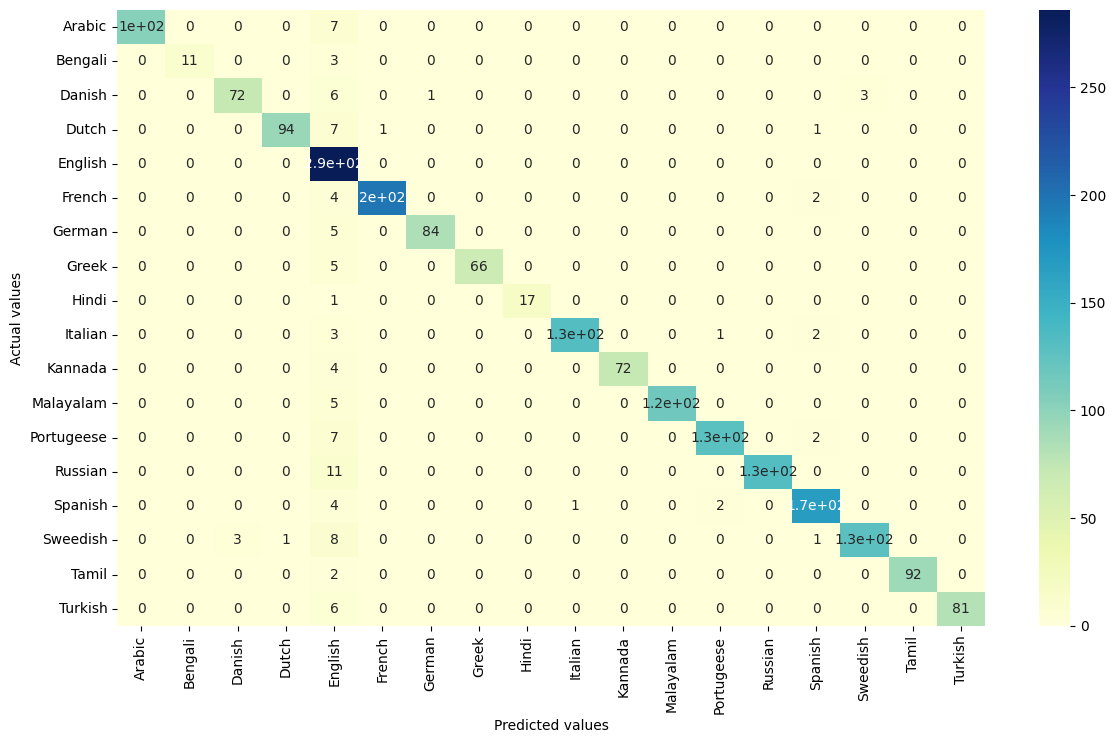

In [ ]:
cm = confusion_matrix(YY_test, y_pred1)

plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels= class_names, yticklabels= class_names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

##Support Vector Machine Model with Hyperparameter Tuning and Evaluation

In [ ]:
param_grid = {
    'C': [0.1, 0.5, 1, 10],
    'max_iter': [500, 1000, 1500]
}

svc = LinearSVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(XX_train, YY_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 10], 'max_iter': [500, 1000, 1500]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_svc_model = grid_search.best_estimator_

y_pred2 = best_svc_model.predict(XX_test)

accuracy = accuracy_score(YY_test, y_pred2) * 100
class_names = label_encoder.classes_
classification_rep = classification_report(YY_test, y_pred2, target_names= class_names)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 10, 'max_iter': 500}
Accuracy: 95.98%
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.95      0.98       110
     Bengali       1.00      1.00      1.00        14
      Danish       0.93      0.93      0.93        82
       Dutch       0.98      0.91      0.94       103
     English       0.83      1.00      0.91       286
      French       0.98      0.97      0.98       203
      German       0.99      0.97      0.98        89
       Greek       1.00      0.93      0.96        71
       Hindi       1.00      1.00      1.00        18
     Italian       1.00      0.96      0.98       138
     Kannada       0.99      0.96      0.97        76
   Malayalam       1.00      0.98      0.99       122
  Portugeese       0.98      0.93      0.96       137
     Russian       1.00      0.93      0.96       143
     Spanish       0.95      0.97      0.96       175
    Sweedish       0.98      0.93      0.96   

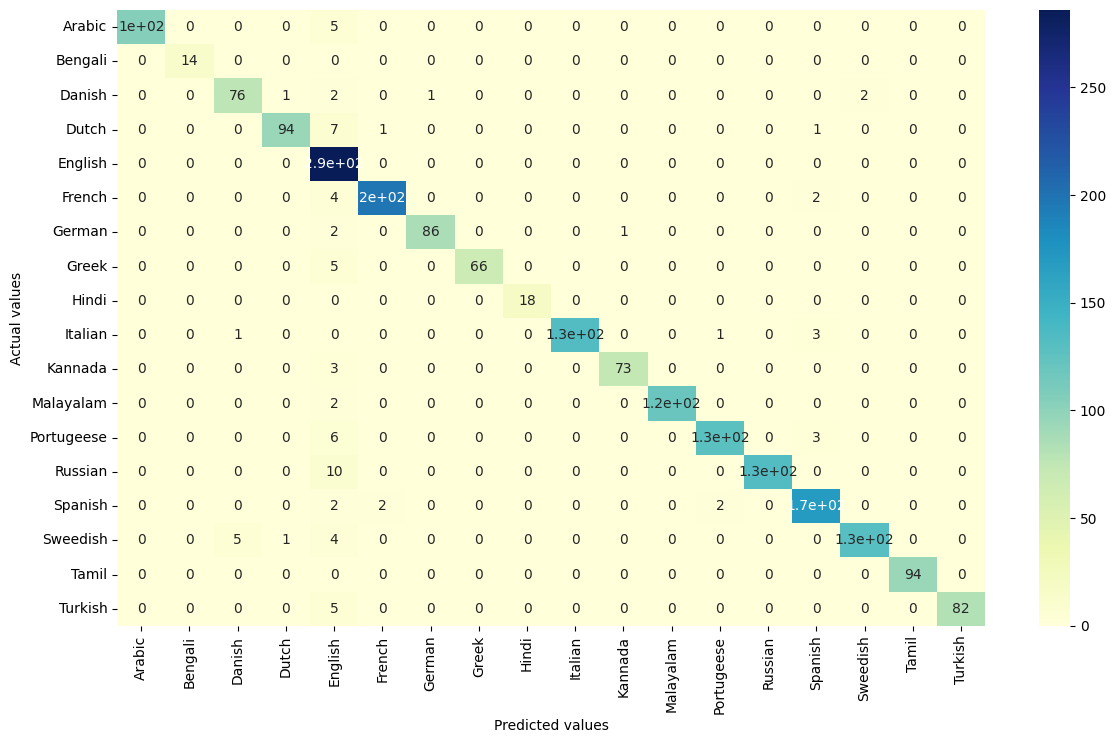

In [ ]:
cm = confusion_matrix(YY_test, y_pred2)

plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels= class_names, yticklabels= class_names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

##Multinomial Naive Bayes Model with Hyperparameter Tuning and Evaluation

In [ ]:
mnb = MultinomialNB()

param_grid = {
    'alpha': [0.1,0.2, 0.3, 0.8, 1.0, 10.0],
}

grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(XX_train, YY_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.8, 1.0, 10.0]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_mnb_model = grid_search.best_estimator_
y_pred3 = best_mnb_model.predict(XX_test)

accuracy = accuracy_score(YY_test, y_pred3)*100
class_names = label_encoder.classes_
classification_rep = classification_report(YY_test, y_pred3, target_names=class_names)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'alpha': 0.1}
Accuracy: 97.61%
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       110
     Bengali       1.00      0.93      0.96        14
      Danish       1.00      0.91      0.96        82
       Dutch       0.98      0.96      0.97       103
     English       0.88      1.00      0.94       286
      French       0.99      0.99      0.99       203
      German       1.00      0.98      0.99        89
       Greek       1.00      0.94      0.97        71
       Hindi       1.00      1.00      1.00        18
     Italian       1.00      0.99      1.00       138
     Kannada       1.00      0.96      0.98        76
   Malayalam       1.00      0.98      0.99       122
  Portugeese       0.99      0.96      0.97       137
     Russian       1.00      0.96      0.98       143
     Spanish       0.99      0.97      0.98       175
    Sweedish       0.96      0.98      0.97       140
    

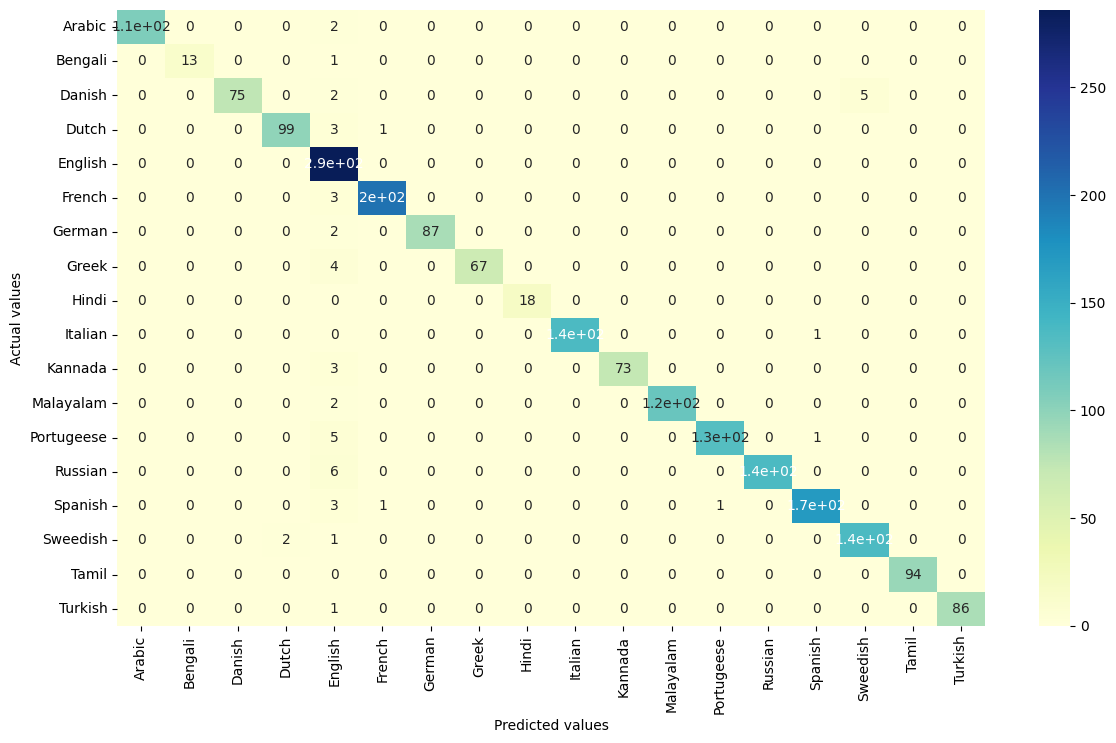

In [ ]:
cm = confusion_matrix(YY_test, y_pred3)

plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels= class_names, yticklabels= class_names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
tfidf_vectorizer = joblib.load('tfidf_vectorizer.joblib')

In [ ]:
texts = [
    'কামদুনির ঘটনায় দোষী সাব্যস্ত সইফুল আলি এবং আনসার আলি। যাদের ফাঁসির সাজা শুনিয়ে ছিল নিম্ন আদালত।',
    'إدانة سيف علي وأنصار علي في قضية كامدوني. وحكمت عليهم المحكمة الابتدائية بالإعدام.',
    'Conviction of Saif Ali and Ansar Ali in the Kamdoni case. The court of first instance sentenced them to death.',
    "Bonjour, comment ça va?"
]

for text in texts:
    text_tfidf = tfidf_vectorizer.transform([text])
    text_tfidf_df = pd.DataFrame.sparse.from_spmatrix(text_tfidf)

    predicted_category = best_mnb_model.predict(text_tfidf_df)
    predicted_language = label_encoder.inverse_transform(predicted_category)[0]

    print("Text:", text)
    print("Predicted Language:", predicted_language)
    print()

Text: কামদুনির ঘটনায় দোষী সাব্যস্ত সইফুল আলি এবং আনসার আলি। যাদের ফাঁসির সাজা শুনিয়ে ছিল নিম্ন আদালত।
Predicted Language: Bengali

Text: إدانة سيف علي وأنصار علي في قضية كامدوني. وحكمت عليهم المحكمة الابتدائية بالإعدام.
Predicted Language: Arabic

Text: Conviction of Saif Ali and Ansar Ali in the Kamdoni case. The court of first instance sentenced them to death.
Predicted Language: English

Text: Bonjour, comment ça va?
Predicted Language: French



##Randomforest Model with Hyperparameter Tuning and Evaluation


In [ ]:
param_grid = {
    'n_estimators': [ 500, 1000],
    'max_depth': [None, 5, 10, 15],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
grid_search.fit(XX_train, YY_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [500, 1000]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_
y_pred4 = best_rf_model.predict(XX_test)

accuracy = accuracy_score(YY_test, y_pred4) * 100
class_names = label_encoder.classes_
classification_rep = classification_report(YY_test, y_pred4, target_names= class_names)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 500}
Accuracy : 91.48%
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.87      0.93       110
     Bengali       1.00      0.93      0.96        14
      Danish       0.92      0.85      0.89        82
       Dutch       0.99      0.87      0.93       103
     English       0.93      0.94      0.94       286
      French       0.97      0.94      0.96       203
      German       0.95      0.90      0.92        89
       Greek       1.00      0.89      0.94        71
       Hindi       1.00      0.94      0.97        18
     Italian       0.98      0.93      0.96       138
     Kannada       0.40      1.00      0.57        76
   Malayalam       1.00      0.95      0.97       122
  Portugeese       0.96      0.91      0.94       137
     Russian       1.00      0.86      0.92       143
     Spanish       0.91      0.92      0.91       175
    Sweedish       0.98      0.

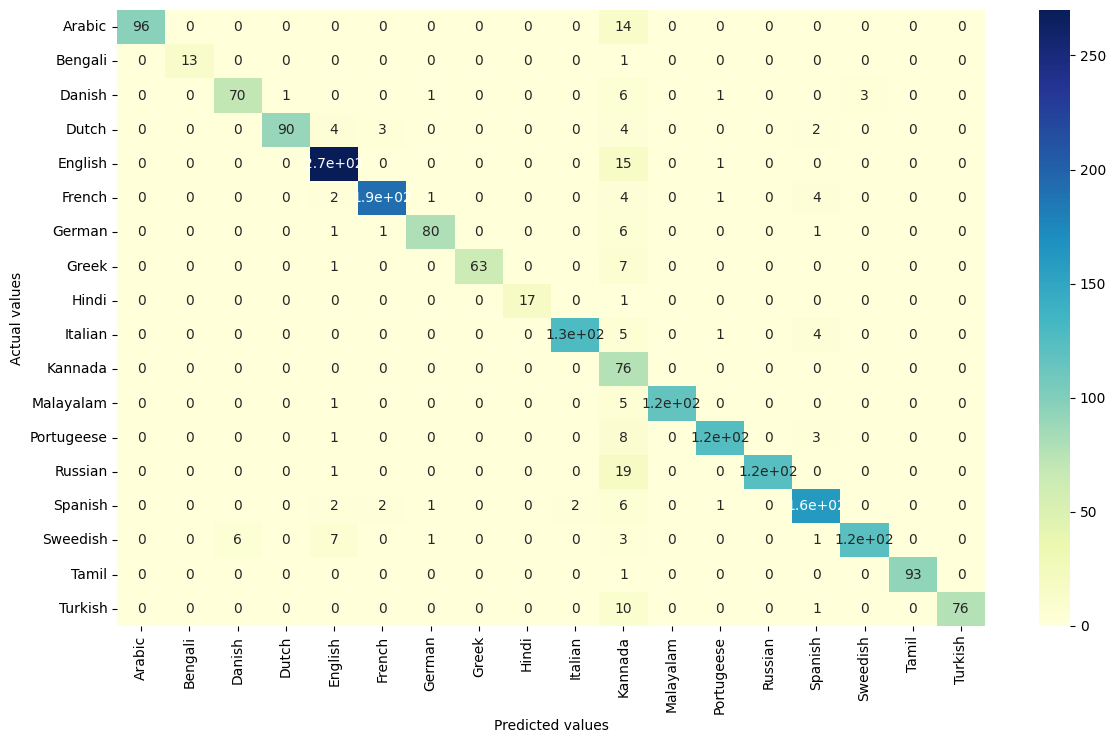

In [ ]:
cm = confusion_matrix(YY_test, y_pred4)

plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels= class_names, yticklabels= class_names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

##GradientBoostingClassifier Model and Evaluation

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=300, max_features=1.0, max_depth=5, random_state=42, verbose=1)
gbc.fit(XX_train, YY_train)
y_pred5 = gbc.predict(XX_test)

accuracy = accuracy_score(YY_test, y_pred5) * 100
class_names = label_encoder.classes_
classification_rep = classification_report(YY_test, y_pred5, target_names= class_names)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:\n")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           1.7639           65.41m
         2           1.5317           55.62m
         3           1.3721           50.50m
         4           1.2497           48.04m
         5           1.1487           47.71m
         6           1.0693           45.37m
         7           1.0023           45.23m
         8           0.9449           43.79m
         9           0.8920           43.91m
        10           0.8446           44.85m
        20           0.5467           41.16m
        30           0.4059           39.82m
        40           0.3255           37.90m
        50           0.2765           36.35m
        60           0.2440           34.45m
        70           0.2188           32.91m
        80           0.1977           31.33m
        90           0.1798           29.73m
       100           0.1649           28.24m
       200           0.0806           13.84m
       300           0.0465            0.00s
Accuracy 

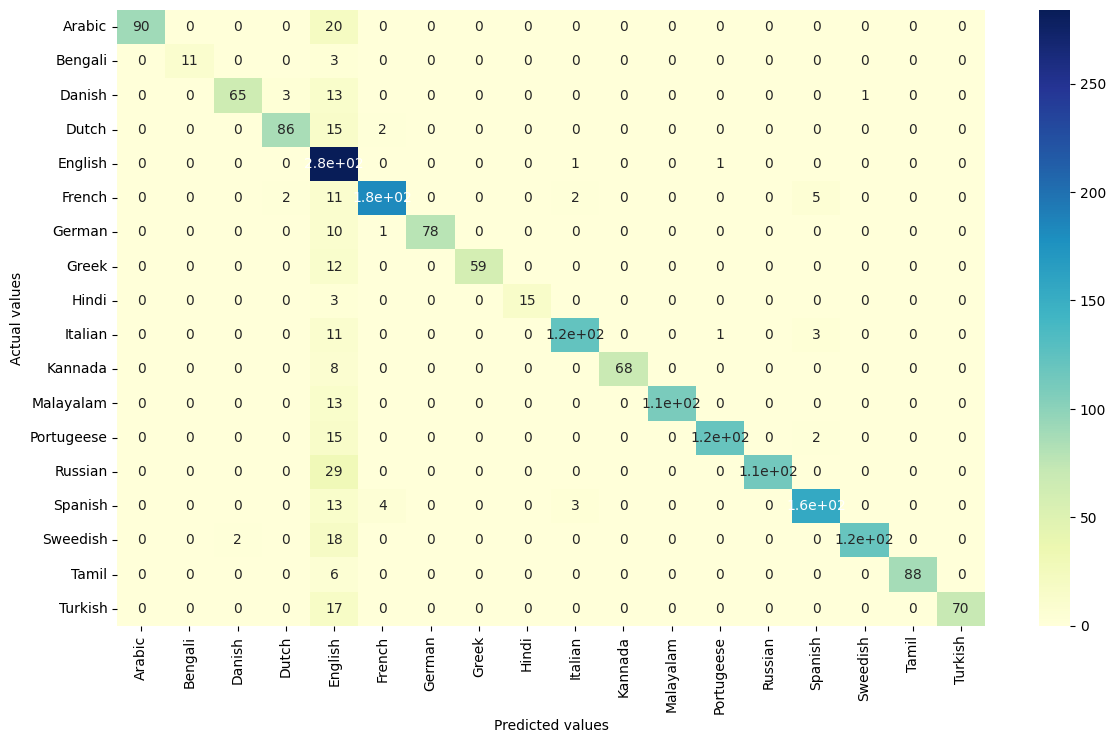

In [ ]:
cm = confusion_matrix(YY_test, y_pred5)

plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels= class_names, yticklabels= class_names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

##Voting Classifier Model and Evaluation

In [ ]:
mnb = MultinomialNB(alpha=0.1)
rfc= RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42)
lr = LogisticRegression(C = 10, max_iter = 500, n_jobs=-1)

ec= VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr)], voting='soft', weights=[3,1,2])
ec.fit(XX_train,YY_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('Multinominal NB', MultinomialNB(alpha=0.1)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=1000,
                                                     random_state=42)),
                             ('Logistic Regression',
                              LogisticRegression(C=10, max_iter=500,
                                                 n_jobs=-1))],
                 voting='soft', weights=[3, 1, 2])

In [ ]:
y_pred6 = ec.predict(XX_test)

accuracy = accuracy_score(YY_test, y_pred6) * 100
class_names = label_encoder.classes_
classification_rep = classification_report(YY_test, y_pred6, target_names= class_names)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:\n")
print(classification_rep)

Accuracy : 96.93%
Classification Report:

              precision    recall  f1-score   support

      Arabic       1.00      0.97      0.99       110
     Bengali       1.00      0.93      0.96        14
      Danish       1.00      0.91      0.96        82
       Dutch       0.99      0.94      0.97       103
     English       0.85      1.00      0.92       286
      French       0.99      0.99      0.99       203
      German       1.00      0.98      0.99        89
       Greek       1.00      0.93      0.96        71
       Hindi       1.00      1.00      1.00        18
     Italian       0.99      0.97      0.98       138
     Kannada       1.00      0.95      0.97        76
   Malayalam       1.00      0.98      0.99       122
  Portugeese       0.99      0.96      0.97       137
     Russian       1.00      0.94      0.97       143
     Spanish       0.98      0.97      0.97       175
    Sweedish       0.96      0.96      0.96       140
       Tamil       1.00      1.00      

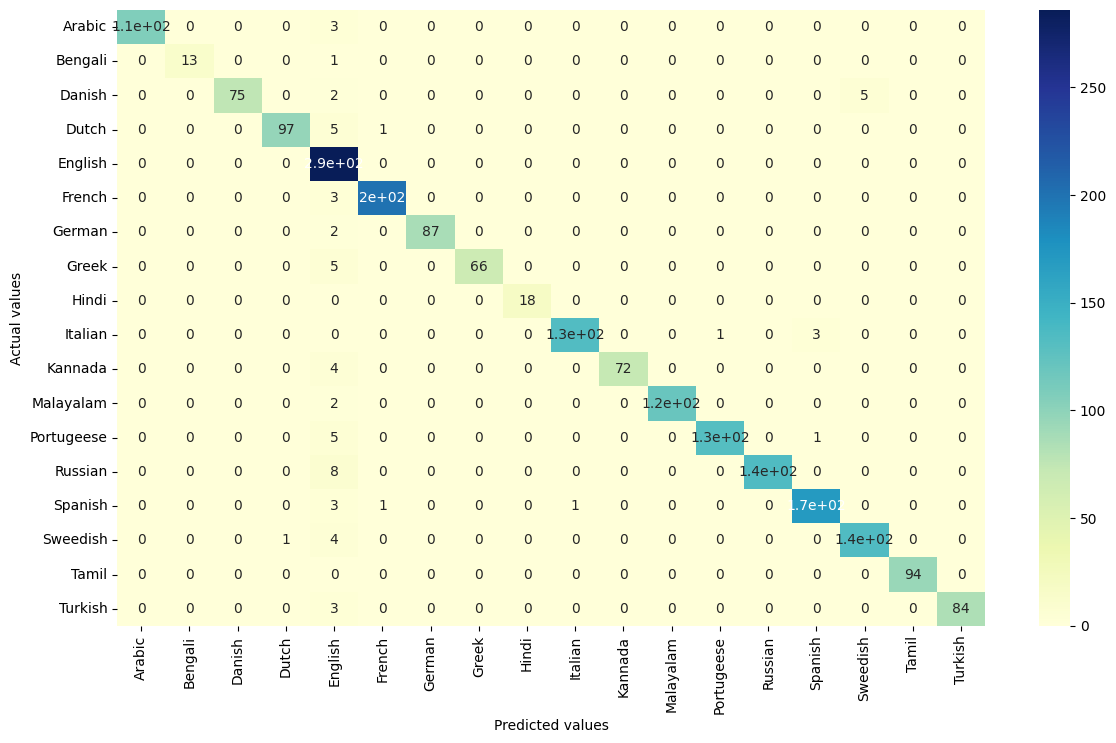

In [ ]:
cm = confusion_matrix(YY_test, y_pred6)

plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels= class_names, yticklabels= class_names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
texts = [
    'কামদুনির ঘটনায় দোষী সাব্যস্ত সইফুল আলি এবং আনসার আলি। যাদের ফাঁসির সাজা শুনিয়ে ছিল নিম্ন আদালত।',
    'إدانة سيف علي وأنصار علي في قضية كامدوني. وحكمت عليهم المحكمة الابتدائية بالإعدام.',
    'Conviction of Saif Ali and Ansar Ali in the Kamdoni case. The court of first instance sentenced them to death.',
    "Bonjour, comment ça va?"
]

for text in texts:
    text_tfidf = tfidf_vectorizer.transform([text])
    text_tfidf_df = pd.DataFrame.sparse.from_spmatrix(text_tfidf)

    predicted_category = ec.predict(text_tfidf_df)
    predicted_language = label_encoder.inverse_transform(predicted_category)[0]

    print("Text:", text)
    print("Predicted Language:", predicted_language)
    print()

Text: কামদুনির ঘটনায় দোষী সাব্যস্ত সইফুল আলি এবং আনসার আলি। যাদের ফাঁসির সাজা শুনিয়ে ছিল নিম্ন আদালত।
Predicted Language: Bengali

Text: إدانة سيف علي وأنصار علي في قضية كامدوني. وحكمت عليهم المحكمة الابتدائية بالإعدام.
Predicted Language: Arabic

Text: Conviction of Saif Ali and Ansar Ali in the Kamdoni case. The court of first instance sentenced them to death.
Predicted Language: English

Text: Bonjour, comment ça va?
Predicted Language: French



##AdaBoost with Random Forest Classifier Model and Evaluation

In [ ]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)
abc= AdaBoostClassifier(estimator=rfc, learning_rate=0.1, n_estimators=200)
abc.fit(XX_train, YY_train)

y_pred7= abc.predict(XX_test)

accuracy = accuracy_score(YY_test, y_pred7) * 100
class_names = label_encoder.classes_
classification_rep = classification_report(YY_test, y_pred7, target_names= class_names)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:\n")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 84.48%
Classification Report:

              precision    recall  f1-score   support

      Arabic       1.00      0.80      0.89       110
     Bengali       1.00      0.57      0.73        14
      Danish       0.98      0.68      0.81        82
       Dutch       1.00      0.80      0.89       103
     English       0.48      1.00      0.65       286
      French       0.99      0.87      0.93       203
      German       1.00      0.84      0.91        89
       Greek       1.00      0.69      0.82        71
       Hindi       1.00      0.78      0.88        18
     Italian       0.99      0.83      0.91       138
     Kannada       1.00      0.86      0.92        76
   Malayalam       1.00      0.91      0.95       122
  Portugeese       1.00      0.80      0.89       137
     Russian       1.00      0.78      0.88       143
     Spanish       0.95      0.87      0.91       175
    Sweedish       0.97      0.81      0.88       140
       Tamil       1.00      0.94      

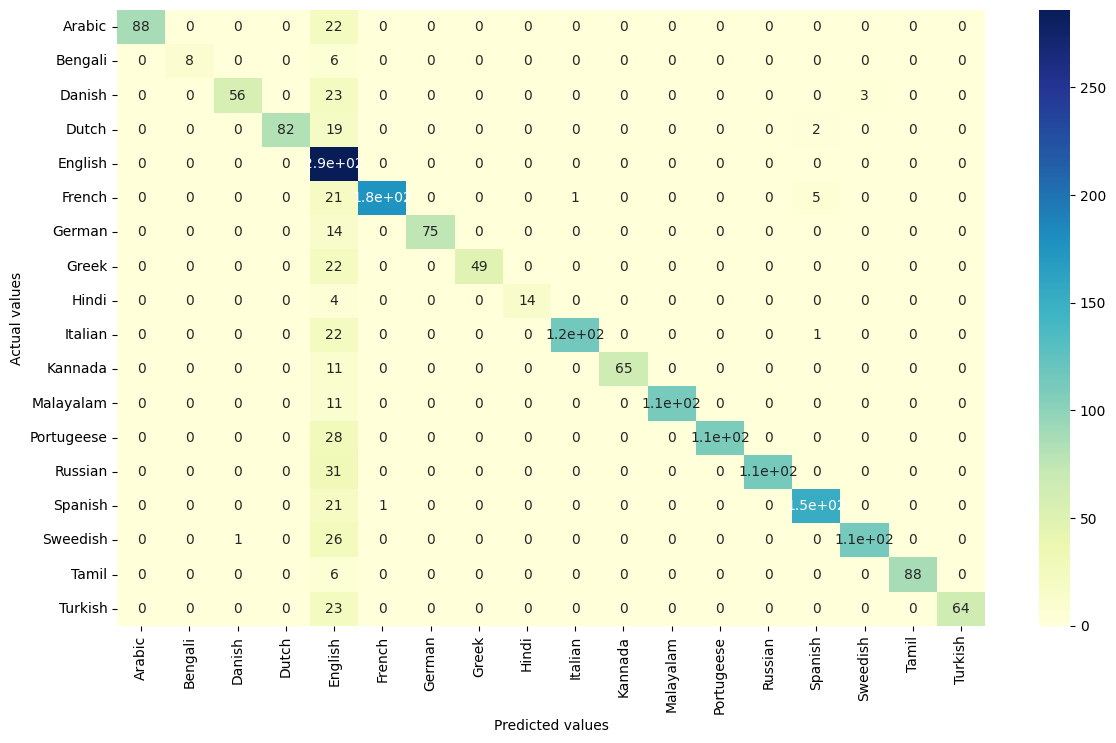

In [ ]:
cm = confusion_matrix(YY_test, y_pred7)

plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels= class_names, yticklabels= class_names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

#Deep Learning Models

##Data Transformation for Neural Text Classification: Label Encoding and Tokenization

In [ ]:
label_encoder = LabelEncoder()
data['Language'] = label_encoder.fit_transform(data['Language'])

In [ ]:
X = data['Text']
y = data['Language']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

39984


In [ ]:
max_length = 120
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##LSTM Model Training, Evaluation, and Prediction

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.3))
model_lstm.add(Flatten())
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 120, 128)          5117952   
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 flatten_7 (Flatten)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 18)               

In [ ]:
hist_lstm= model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
131/131 [==============================] - 25s 152ms/step - loss: 2.2850 - accuracy: 0.2891 - val_loss: 1.1530 - val_accuracy: 0.7337
Epoch 2/10
131/131 [==============================] - 14s 105ms/step - loss: 0.5991 - accuracy: 0.8419 - val_loss: 0.3103 - val_accuracy: 0.9325
Epoch 3/10
131/131 [==============================] - 12s 95ms/step - loss: 0.1675 - accuracy: 0.9594 - val_loss: 0.2235 - val_accuracy: 0.9382
Epoch 4/10
131/131 [==============================] - 9s 65ms/step - loss: 0.0710 - accuracy: 0.9842 - val_loss: 0.1904 - val_accuracy: 0.9464
Epoch 5/10
131/131 [==============================] - 7s 51ms/step - loss: 0.0500 - accuracy: 0.9902 - val_loss: 0.1715 - val_accuracy: 0.9531
Epoch 6/10
131/131 [==============================] - 6s 43ms/step - loss: 0.0238 - accuracy: 0.9968 - val_loss: 0.1889 - val_accuracy: 0.9468
Epoch 7/10
131/131 [==============================] - 6s 44ms/step - loss: 0.0195 - accuracy: 0.9964 - val_loss: 0.2013 - val_accuracy: 0

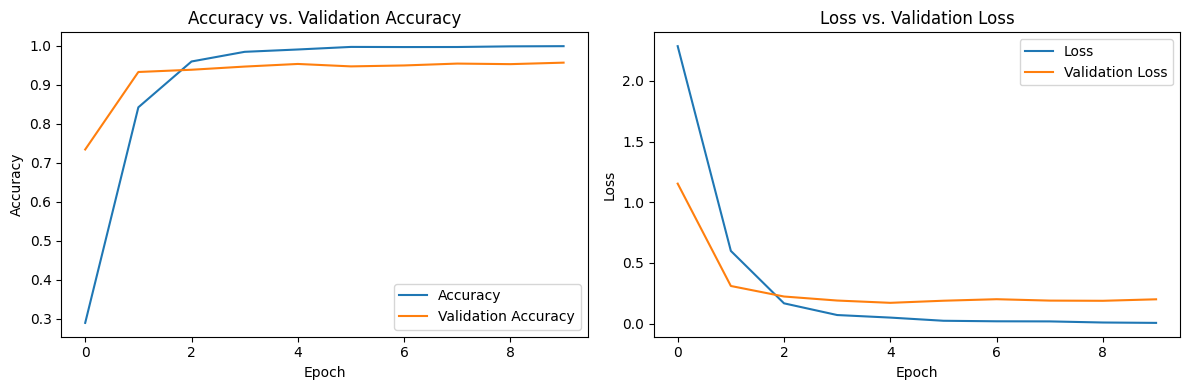

In [ ]:
accuracy = hist_lstm.history['accuracy']
val_accuracy = hist_lstm.history['val_accuracy']
loss = hist_lstm.history['loss']
val_loss = hist_lstm.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(hist_lstm.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.285011,0.289051,1.153008,0.733716
1,0.599134,0.841878,0.310263,0.932471
2,0.167466,0.959391,0.223522,0.938218
3,0.071034,0.984188,0.190412,0.946360
4,0.049973,0.990177,0.171534,0.953065
5,0.023828,0.996766,0.188863,0.946839
6,0.019468,0.996406,0.201324,0.949234
7,0.018589,0.996526,0.189876,0.954023
8,0.009503,0.998203,0.188315,0.952586
9,0.006382,0.998682,0.200552,0.956418


In [ ]:
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

66/66 [==============================] - 1s 8ms/step - loss: 0.2006 - accuracy: 0.9564
Test Loss: 0.2006
Test Accuracy: 95.64%


In [ ]:
class_names = label_encoder.classes_

y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_lstm.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

66/66 [==============================] - 1s 5ms/step
Classification Report:
               precision    recall  f1-score   support

      Arabic       0.73      1.00      0.85       110
     Bengali       0.86      0.86      0.86        14
      Danish       0.86      0.93      0.89        82
       Dutch       0.98      0.92      0.95       103
     English       0.97      0.98      0.97       286
      French       0.98      0.97      0.97       203
      German       1.00      0.96      0.98        89
       Greek       1.00      0.96      0.98        71
       Hindi       1.00      1.00      1.00        18
     Italian       0.99      0.96      0.98       138
     Kannada       0.99      0.96      0.97        76
   Malayalam       0.98      0.95      0.97       122
  Portugeese       1.00      0.93      0.96       137
     Russian       1.00      0.96      0.98       143
     Spanish       0.95      0.97      0.96       175
    Sweedish       0.97      0.91      0.94       140
    

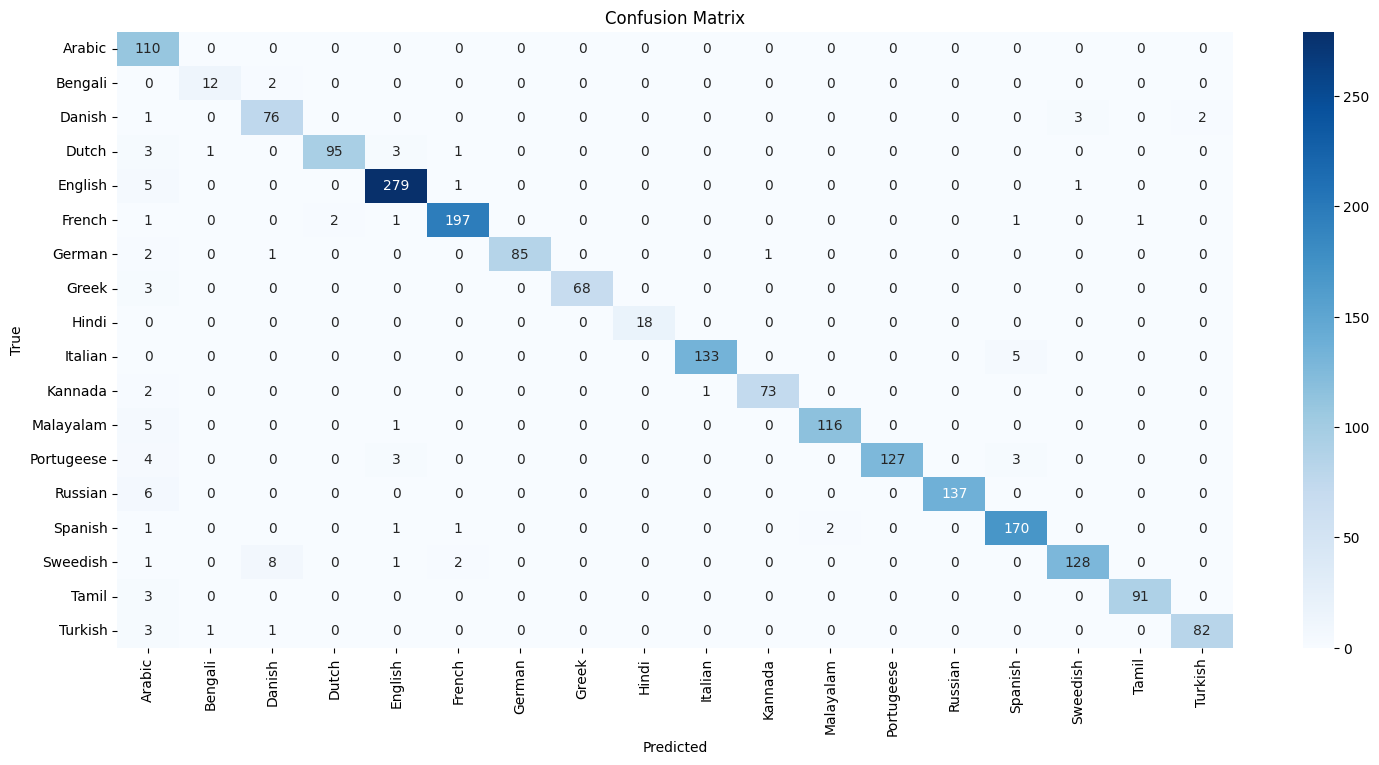

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_languages(texts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for text in texts:
        cleaned_text = clean_text(text)
        sequences = tokenizer.texts_to_sequences([cleaned_text])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_language = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_language, probabilities.max()))

    return predictions

texts = [
    "Hello how are you?",
    "Hola, ¿cómo estás?",
    "Bonjour, comment ça va?",
    'مرحبا، كيف حالك؟'
]

predicted_languages = predict_languages( texts, model_lstm, tokenizer, max_length, label_encoder)

for text, (predicted_language, probability) in zip(texts, predicted_languages):
    print(f"Text: '{text}'")
    print(f"Predicted Language: {predicted_language}")
    print(f"Probability of {predicted_language}: {probability:.4f}\n")


1/1 [==============================] - 0s 20ms/step
Text: 'Hello how are you?'
Predicted Language: English
Probability of English: 0.9637

Text: 'Hola, ¿cómo estás?'
Predicted Language: Spanish
Probability of Spanish: 1.0000

Text: 'Bonjour, comment ça va?'
Predicted Language: French
Probability of French: 1.0000

Text: 'مرحبا، كيف حالك؟'
Predicted Language: Arabic
Probability of Arabic: 0.6543



##GRU Model Training, Evaluation, and Prediction

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_gru.add(GRU(128))
model_gru.add(Dropout(0.3))
model_gru.add(Flatten())
model_gru.add(Dense(128, activation='relu'))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 120, 128)          5117952   
                                                                 
 gru_3 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 flatten_10 (Flatten)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 18)              

In [ ]:
hist_gru = model_gru.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
131/131 [==============================] - 26s 164ms/step - loss: 2.2898 - accuracy: 0.2332 - val_loss: 1.2690 - val_accuracy: 0.5685
Epoch 2/10
131/131 [==============================] - 13s 102ms/step - loss: 0.7008 - accuracy: 0.7861 - val_loss: 0.3434 - val_accuracy: 0.9033
Epoch 3/10
131/131 [==============================] - 11s 84ms/step - loss: 0.1888 - accuracy: 0.9455 - val_loss: 0.2223 - val_accuracy: 0.9339
Epoch 4/10
131/131 [==============================] - 9s 66ms/step - loss: 0.0631 - accuracy: 0.9833 - val_loss: 0.1954 - val_accuracy: 0.9454
Epoch 5/10
131/131 [==============================] - 6s 50ms/step - loss: 0.0272 - accuracy: 0.9952 - val_loss: 0.2105 - val_accuracy: 0.9454
Epoch 6/10
131/131 [==============================] - 5s 41ms/step - loss: 0.0155 - accuracy: 0.9968 - val_loss: 0.2357 - val_accuracy: 0.9406
Epoch 7/10
131/131 [==============================] - 7s 51ms/step - loss: 0.0114 - accuracy: 0.9974 - val_loss: 0.2312 - val_accuracy: 0

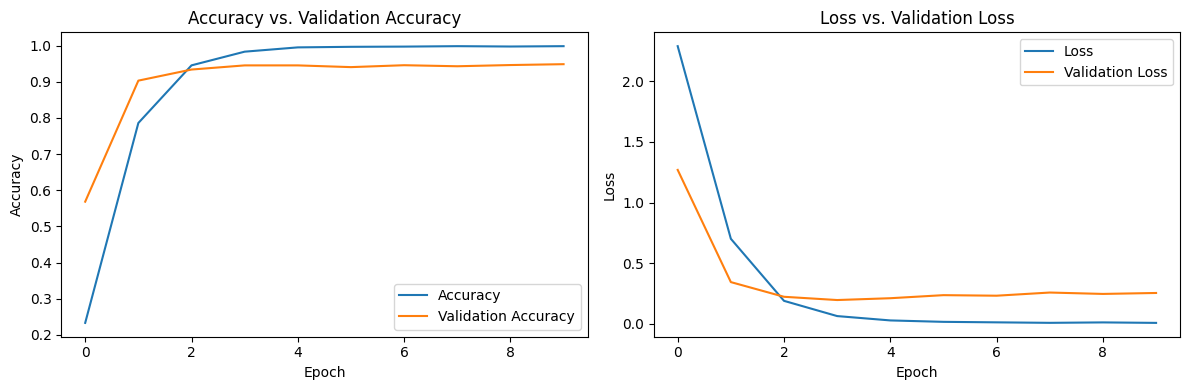

In [ ]:
accuracy = hist_gru.history['accuracy']
val_accuracy = hist_gru.history['val_accuracy']
loss = hist_gru.history['loss']
val_loss = hist_gru.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(hist_gru.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.289762,0.233230,1.268999,0.568487
1,0.700822,0.786057,0.343431,0.903257
2,0.188783,0.945496,0.222252,0.933908
3,0.063087,0.983349,0.195428,0.945402
4,0.027230,0.995208,0.210467,0.945402
5,0.015532,0.996766,0.235731,0.940613
6,0.011420,0.997365,0.231206,0.945881
7,0.007351,0.998563,0.257321,0.943008
8,0.010931,0.997604,0.245889,0.946360
9,0.006956,0.998563,0.253733,0.948755


In [ ]:
loss, accuracy = model_gru.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

66/66 [==============================] - 1s 12ms/step - loss: 0.2537 - accuracy: 0.9488
Test Loss: 0.2537
Test Accuracy: 94.88%


In [ ]:
class_names = label_encoder.classes_

y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_gru.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

66/66 [==============================] - 0s 6ms/step
Classification Report:
               precision    recall  f1-score   support

      Arabic       0.71      0.99      0.83       110
     Bengali       1.00      0.86      0.92        14
      Danish       0.89      0.93      0.91        82
       Dutch       1.00      0.91      0.95       103
     English       0.97      0.97      0.97       286
      French       0.98      0.97      0.97       203
      German       0.99      0.96      0.97        89
       Greek       1.00      0.96      0.98        71
       Hindi       1.00      1.00      1.00        18
     Italian       0.97      0.96      0.97       138
     Kannada       0.99      0.96      0.97        76
   Malayalam       1.00      0.92      0.96       122
  Portugeese       1.00      0.91      0.95       137
     Russian       0.99      0.96      0.97       143
     Spanish       0.93      0.97      0.95       175
    Sweedish       0.99      0.91      0.95       140
    

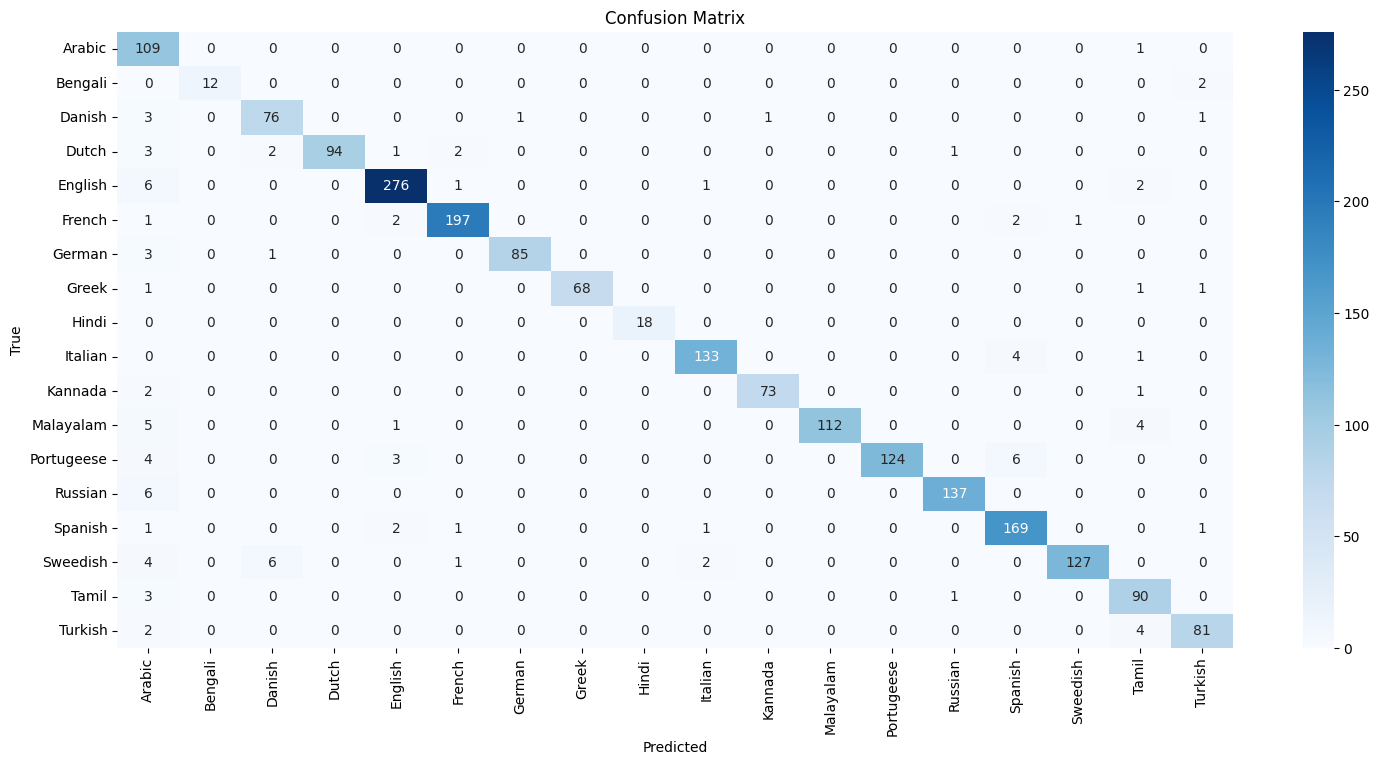

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_languages(texts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for text in texts:
        cleaned_text = clean_text(text)
        sequences = tokenizer.texts_to_sequences([cleaned_text])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_language = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_language, probabilities.max()))

    return predictions

texts = [
    "Hello how are you?",
    "Hola, ¿cómo estás?",
    "Bonjour, comment ça va?",
    'مرحبا، كيف حالك؟'
]

predicted_languages = predict_languages( texts, model_gru, tokenizer, max_length, label_encoder)

for text, (predicted_language, probability) in zip(texts, predicted_languages):
    print(f"Text: '{text}'")
    print(f"Predicted Language: {predicted_language}")
    print(f"Probability of {predicted_language}: {probability:.4f}\n")


1/1 [==============================] - 0s 98ms/step
Text: 'Hello how are you?'
Predicted Language: English
Probability of English: 0.9866

Text: 'Hola, ¿cómo estás?'
Predicted Language: Spanish
Probability of Spanish: 0.9999

Text: 'Bonjour, comment ça va?'
Predicted Language: French
Probability of French: 0.9999

Text: 'مرحبا، كيف حالك؟'
Predicted Language: Arabic
Probability of Arabic: 0.9942



##CNN Model Training, Evaluation, and Prediction

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_cnn.add(Conv1D(64, 2, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(128, 2, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 120, 128)          5117952   
                                                                 
 conv1d_3 (Conv1D)           (None, 119, 64)           16448     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 59, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 58, 128)           16512     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 29, 128)           0         
 g1D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 3712)            

In [ ]:
hist_cnn= model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
131/131 [==============================] - 26s 182ms/step - loss: 2.3480 - accuracy: 0.2511 - val_loss: 1.4241 - val_accuracy: 0.5345
Epoch 2/10
131/131 [==============================] - 13s 99ms/step - loss: 0.8268 - accuracy: 0.7246 - val_loss: 0.5023 - val_accuracy: 0.8683
Epoch 3/10
131/131 [==============================] - 10s 73ms/step - loss: 0.2747 - accuracy: 0.9209 - val_loss: 0.3376 - val_accuracy: 0.9080
Epoch 4/10
131/131 [==============================] - 7s 54ms/step - loss: 0.1254 - accuracy: 0.9644 - val_loss: 0.3170 - val_accuracy: 0.9095
Epoch 5/10
131/131 [==============================] - 5s 36ms/step - loss: 0.1067 - accuracy: 0.9697 - val_loss: 0.3235 - val_accuracy: 0.9143
Epoch 6/10
131/131 [==============================] - 5s 40ms/step - loss: 0.0916 - accuracy: 0.9738 - val_loss: 0.3383 - val_accuracy: 0.9152
Epoch 7/10
131/131 [==============================] - 4s 30ms/step - loss: 0.0821 - accuracy: 0.9747 - val_loss: 0.3381 - val_accuracy: 0.

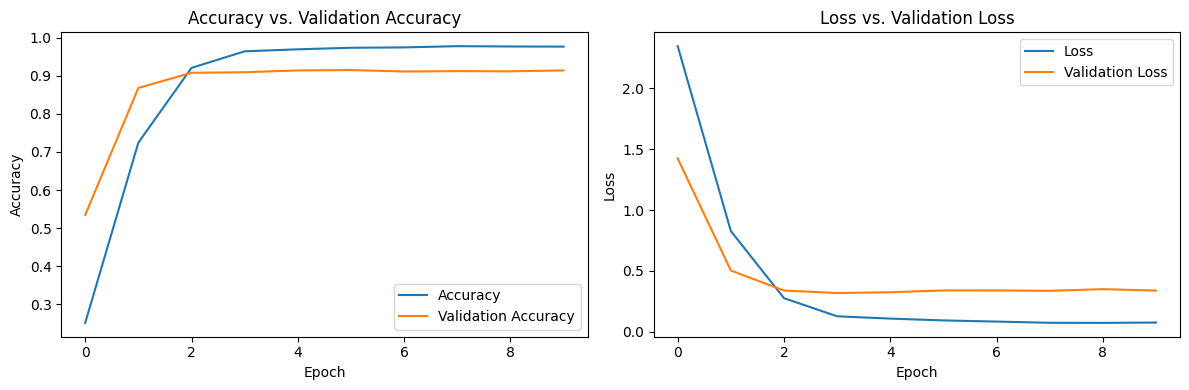

In [ ]:
accuracy = hist_cnn.history['accuracy']
val_accuracy = hist_cnn.history['val_accuracy']
loss = hist_cnn.history['loss']
val_loss = hist_cnn.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(hist_cnn.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.348001,0.251078,1.424108,0.534483
1,0.826814,0.724605,0.502280,0.868295
2,0.274654,0.920939,0.337647,0.908046
3,0.125407,0.964423,0.316954,0.909483
4,0.106654,0.969693,0.323488,0.914272
5,0.091623,0.973766,0.338269,0.915230
6,0.082052,0.974724,0.338059,0.911398
7,0.072097,0.977959,0.335212,0.912356
8,0.071321,0.977120,0.348913,0.911877
9,0.074169,0.976761,0.336915,0.914272


In [ ]:
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

66/66 [==============================] - 0s 6ms/step - loss: 0.3369 - accuracy: 0.9143
Test Loss: 0.3369
Test Accuracy: 91.43%


In [ ]:
class_names = label_encoder.classes_

y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_cnn.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

66/66 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

      Arabic       0.97      0.87      0.92       110
     Bengali       1.00      0.86      0.92        14
      Danish       0.91      0.82      0.86        82
       Dutch       0.94      0.88      0.91       103
     English       0.73      0.98      0.84       286
      French       0.99      0.94      0.96       203
      German       0.97      0.94      0.95        89
       Greek       0.95      0.87      0.91        71
       Hindi       0.94      0.94      0.94        18
     Italian       0.93      0.93      0.93       138
     Kannada       0.96      0.93      0.95        76
   Malayalam       0.97      0.88      0.92       122
  Portugeese       0.98      0.93      0.95       137
     Russian       1.00      0.90      0.95       143
     Spanish       0.90      0.95      0.92       175
    Sweedish       0.95      0.88      0.91       140
    

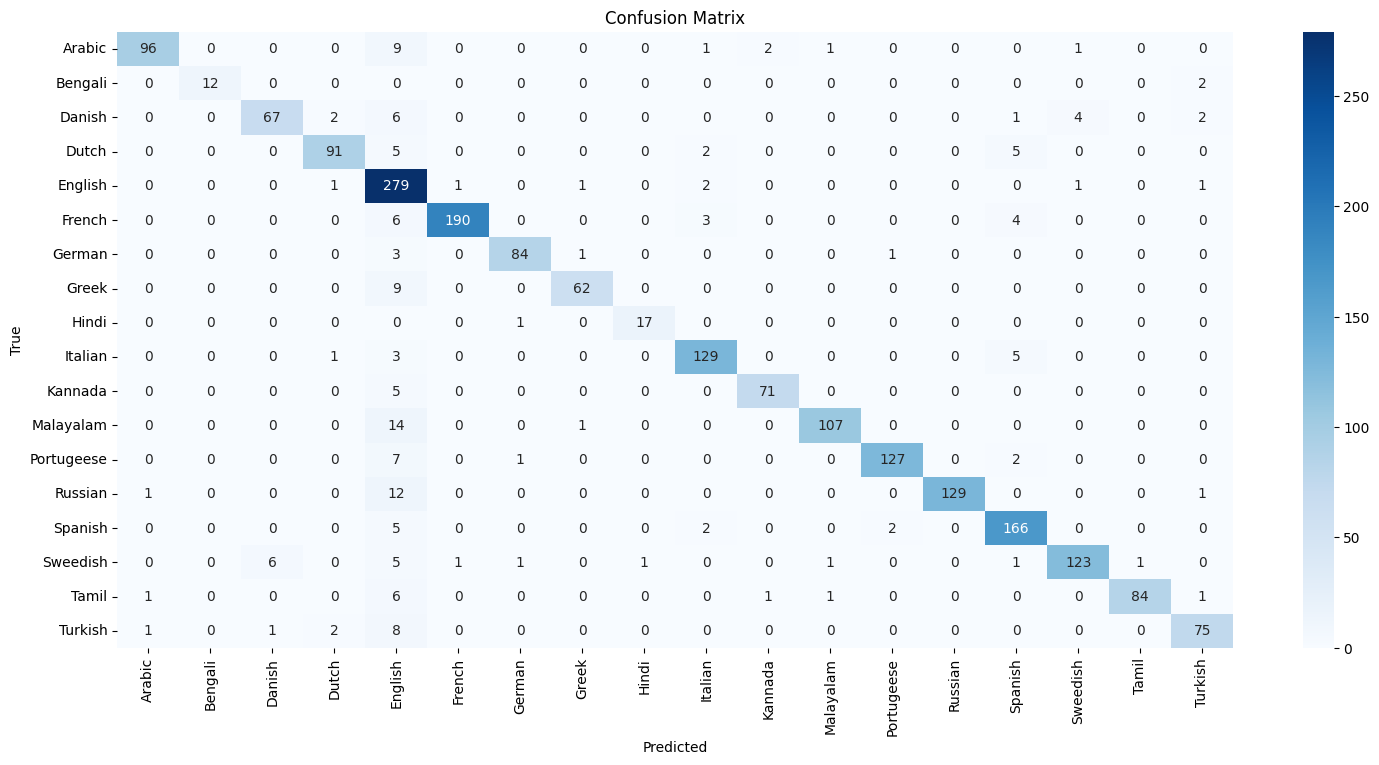

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_languages(texts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for text in texts:
        cleaned_text = clean_text(text)
        sequences = tokenizer.texts_to_sequences([cleaned_text])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_language = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_language, probabilities.max()))

    return predictions

texts = [
    "Hello how are you?",
    "Hola, ¿cómo estás?",
    "Bonjour, comment ça va?",
    'مرحبا، كيف حالك؟'
]

predicted_languages = predict_languages( texts, model_cnn, tokenizer, max_length, label_encoder)

for text, (predicted_language, probability) in zip(texts, predicted_languages):
    print(f"Text: '{text}'")
    print(f"Predicted Language: {predicted_language}")
    print(f"Probability of {predicted_language}: {probability:.4f}\n")


1/1 [==============================] - 0s 29ms/step
Text: 'Hello how are you?'
Predicted Language: English
Probability of English: 0.0988

Text: 'Hola, ¿cómo estás?'
Predicted Language: Spanish
Probability of Spanish: 0.9975

Text: 'Bonjour, comment ça va?'
Predicted Language: French
Probability of French: 1.0000

Text: 'مرحبا، كيف حالك؟'
Predicted Language: Arabic
Probability of Arabic: 0.9267



## Hybrid Model Training, Evaluation, and Prediction

In [ ]:
model_hb = Sequential()
model_hb.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_hb.add(Conv1D(128, 2, activation='relu'))
model_hb.add(MaxPooling1D(2))
model_hb.add(GRU(128))
model_hb.add(Flatten())
model_hb.add(Dense(128, activation='relu'))
model_hb.add(Dropout(0.3))
model_hb.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_hb.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_hb.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 128)          5117952   
                                                                 
 conv1d_4 (Conv1D)           (None, 119, 128)          32896     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 59, 128)           0         
 g1D)                                                            
                                                                 
 gru_3 (GRU)                 (None, 128)               99072     
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                      

In [ ]:
hist_hb= model_hb.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
131/131 [==============================] - 25s 168ms/step - loss: 2.0882 - accuracy: 0.3178 - val_loss: 0.9083 - val_accuracy: 0.7131
Epoch 2/10
131/131 [==============================] - 15s 112ms/step - loss: 0.4755 - accuracy: 0.8474 - val_loss: 0.3374 - val_accuracy: 0.8989
Epoch 3/10
131/131 [==============================] - 8s 63ms/step - loss: 0.1537 - accuracy: 0.9558 - val_loss: 0.2754 - val_accuracy: 0.9176
Epoch 4/10
131/131 [==============================] - 9s 72ms/step - loss: 0.0855 - accuracy: 0.9768 - val_loss: 0.2752 - val_accuracy: 0.9195
Epoch 5/10
131/131 [==============================] - 5s 39ms/step - loss: 0.0744 - accuracy: 0.9783 - val_loss: 0.2698 - val_accuracy: 0.9205
Epoch 6/10
131/131 [==============================] - 6s 43ms/step - loss: 0.0706 - accuracy: 0.9786 - val_loss: 0.2801 - val_accuracy: 0.9219
Epoch 7/10
131/131 [==============================] - 4s 32ms/step - loss: 0.0662 - accuracy: 0.9802 - val_loss: 0.2675 - val_accuracy: 0.

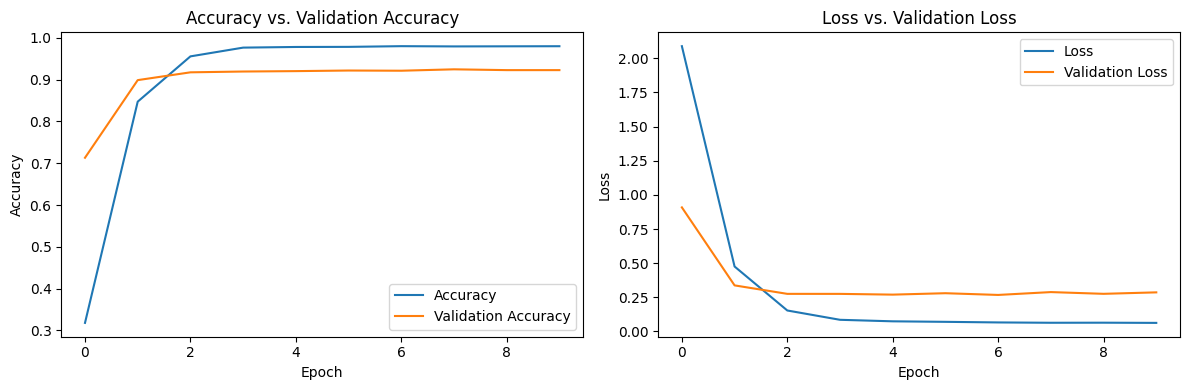

In [ ]:
accuracy = hist_hb.history['accuracy']
val_accuracy = hist_hb.history['val_accuracy']
loss = hist_hb.history['loss']
val_loss = hist_hb.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(hist_hb.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.088225,0.317801,0.908278,0.713123
1,0.475510,0.847389,0.337386,0.898946
2,0.153660,0.955798,0.275380,0.917625
3,0.085502,0.976761,0.275245,0.919540
4,0.074411,0.978318,0.269762,0.920498
5,0.070618,0.978558,0.280120,0.921935
6,0.066230,0.980235,0.267494,0.921456
7,0.063822,0.979636,0.288320,0.924808
8,0.064342,0.979875,0.275659,0.922893
9,0.062937,0.980115,0.286350,0.922893


In [ ]:
loss, accuracy = model_hb.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

66/66 [==============================] - 0s 6ms/step - loss: 0.2864 - accuracy: 0.9229
Test Loss: 0.2864
Test Accuracy: 92.29%


In [ ]:
class_names = label_encoder.classes_

y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_hb.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

66/66 [==============================] - 3s 5ms/step
Classification Report:
               precision    recall  f1-score   support

      Arabic       0.99      0.88      0.93       110
     Bengali       1.00      0.93      0.96        14
      Danish       0.97      0.82      0.89        82
       Dutch       0.94      0.87      0.90       103
     English       0.73      0.98      0.84       286
      French       0.96      0.95      0.96       203
      German       0.98      0.94      0.96        89
       Greek       0.97      0.87      0.92        71
       Hindi       1.00      1.00      1.00        18
     Italian       0.99      0.93      0.96       138
     Kannada       0.99      0.93      0.96        76
   Malayalam       0.96      0.88      0.92       122
  Portugeese       0.96      0.93      0.95       137
     Russian       0.99      0.91      0.95       143
     Spanish       0.93      0.94      0.93       175
    Sweedish       0.97      0.92      0.95       140
    

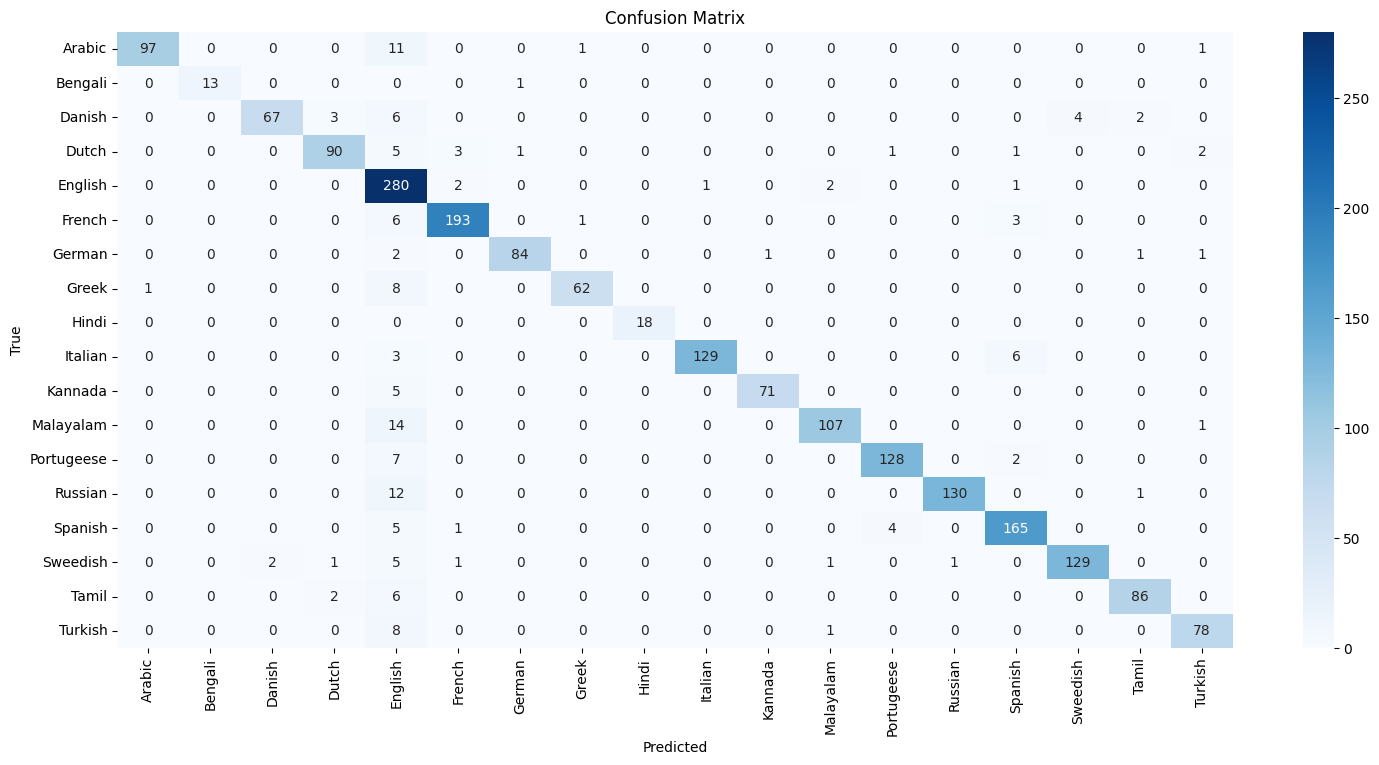

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_languages(texts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for text in texts:
        cleaned_text = clean_text(text)
        sequences = tokenizer.texts_to_sequences([cleaned_text])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_language = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_language, probabilities.max()))

    return predictions

texts = [
    "Hello how are you?",
    "Hola, ¿cómo estás?",
    "Bonjour, comment ça va?",
    'مرحبا، كيف حالك؟'
]

predicted_languages = predict_languages( texts, model_hb, tokenizer, max_length, label_encoder)

for text, (predicted_language, probability) in zip(texts, predicted_languages):
    print(f"Text: '{text}'")
    print(f"Predicted Language: {predicted_language}")
    print(f"Probability of {predicted_language}: {probability:.4f}\n")


1/1 [==============================] - 0s 34ms/step
Text: 'Hello how are you?'
Predicted Language: English
Probability of English: 0.1030

Text: 'Hola, ¿cómo estás?'
Predicted Language: Spanish
Probability of Spanish: 0.9994

Text: 'Bonjour, comment ça va?'
Predicted Language: French
Probability of French: 1.0000

Text: 'مرحبا، كيف حالك؟'
Predicted Language: Arabic
Probability of Arabic: 0.4433



##DNN Model Training, Evaluation, and Prediction

In [ ]:
model_dnn = Sequential()
model_dnn.add(Dense(128, input_shape=(36534,), activation='relu'))
model_dnn.add(Flatten())
model_dnn.add(Dense(units= 512, activation='relu'))
model_dnn.add(Dense(units= 256, activation='relu'))
model_dnn.add(Dense(units= 128, activation='relu'))
model_dnn.add(Dense(units= 18, activation='softmax'))
model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4676480   
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 18)                2322      
                                                                 
Total params: 4909074 (18.73 MB)
Trainable params: 49090

In [ ]:
hist_dnn= model_dnn.fit(XX_train, YY_train, epochs=10, batch_size= 16, validation_data= (XX_test, YY_test))

Epoch 1/10
522/522 [==============================] - 41s 75ms/step - loss: 0.7322 - accuracy: 0.7764 - val_loss: 0.1843 - val_accuracy: 0.9483
Epoch 2/10
522/522 [==============================] - 36s 70ms/step - loss: 0.0753 - accuracy: 0.9775 - val_loss: 0.1355 - val_accuracy: 0.9636
Epoch 3/10
522/522 [==============================] - 39s 74ms/step - loss: 0.0171 - accuracy: 0.9950 - val_loss: 0.1444 - val_accuracy: 0.9617
Epoch 4/10
522/522 [==============================] - 36s 69ms/step - loss: 0.0126 - accuracy: 0.9968 - val_loss: 0.1736 - val_accuracy: 0.9622
Epoch 5/10
522/522 [==============================] - 37s 70ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.1598 - val_accuracy: 0.9607
Epoch 6/10
522/522 [==============================] - 36s 69ms/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.1861 - val_accuracy: 0.9555
Epoch 7/10
522/522 [==============================] - 37s 71ms/step - loss: 0.0096 - accuracy: 0.9976 - val_loss: 0.1853 - val_accuracy:

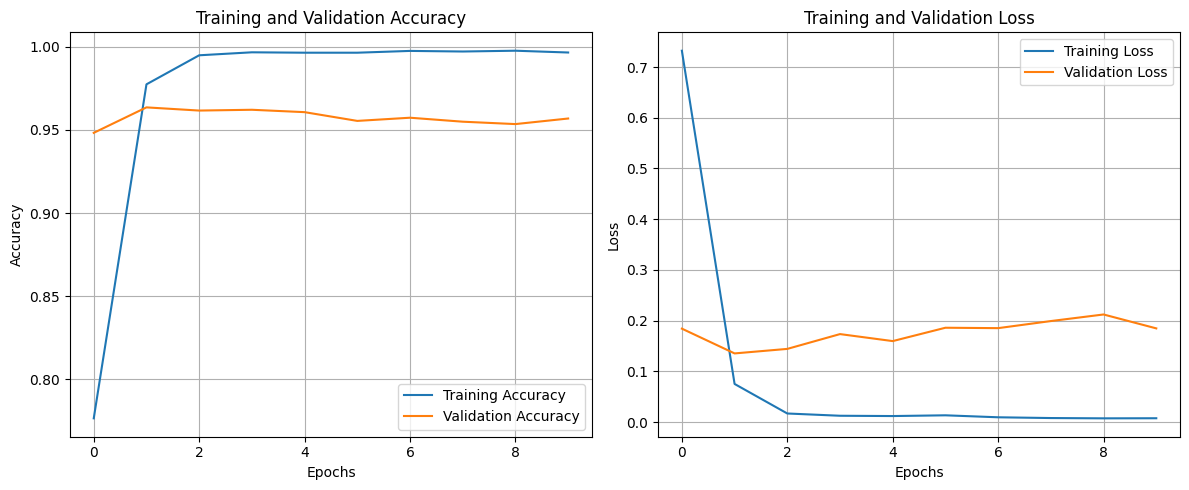

In [ ]:
train_acc = hist_dnn.history['accuracy']
val_acc = hist_dnn.history['val_accuracy']
train_loss = hist_dnn.history['loss']
val_loss = hist_dnn.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(hist_dnn.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.732172,0.776354,0.184310,0.948276
1,0.075296,0.977480,0.135483,0.963602
2,0.017064,0.994969,0.144395,0.961686
3,0.012601,0.996766,0.173579,0.962165
4,0.012019,0.996526,0.159777,0.960728
5,0.013479,0.996526,0.186098,0.955460
6,0.009579,0.997604,0.185302,0.957375
7,0.008092,0.997245,0.199263,0.954981
8,0.007505,0.997724,0.212238,0.953544
9,0.007694,0.996646,0.184829,0.956897


In [ ]:
results = model_dnn.evaluate(XX_test,YY_test)

loss = round(results[0], 2)
accuracy = round(results[1] * 100, 2)

print(f'Test results - Loss: {loss} - Accuracy: {accuracy}%')

66/66 [==============================] - 1s 15ms/step - loss: 0.1848 - accuracy: 0.9569
Test results - Loss: 0.18 - Accuracy: 95.69%


In [ ]:
prediction=model_dnn.predict(XX_test)
y_pred = np.argmax(model_dnn.predict(XX_test), axis=1)

class_names = label_encoder.classes_

report = classification_report(y_test, y_pred, target_names=class_names)
print('Classification Report:\n', report)

66/66 [==============================] - 1s 20ms/step
Classification Report:
               precision    recall  f1-score   support

      Arabic       0.92      0.98      0.95       110
     Bengali       1.00      1.00      1.00        14
      Danish       0.94      0.91      0.93        82
       Dutch       0.98      0.95      0.97       103
     English       0.96      0.98      0.97       286
      French       0.98      0.97      0.98       203
      German       1.00      0.94      0.97        89
       Greek       1.00      0.93      0.96        71
       Hindi       1.00      1.00      1.00        18
     Italian       0.99      0.97      0.98       138
     Kannada       0.68      1.00      0.81        76
   Malayalam       1.00      0.97      0.98       122
  Portugeese       1.00      0.91      0.95       137
     Russian       1.00      0.88      0.94       143
     Spanish       0.95      0.96      0.96       175
    Sweedish       0.97      0.96      0.97       140
   

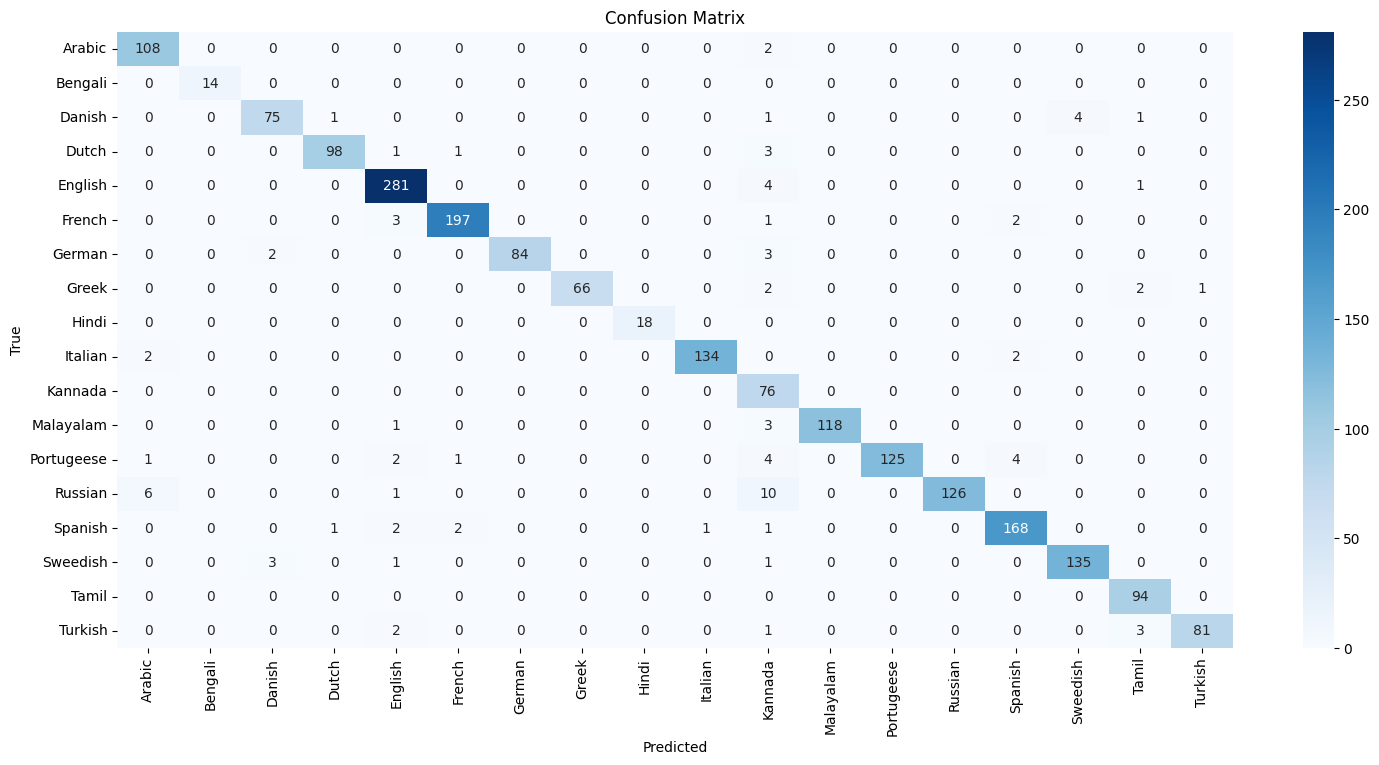

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
texts = [
    'কামদুনির ঘটনায় দোষী সাব্যস্ত সইফুল আলি এবং আনসার আলি। যাদের ফাঁসির সাজা শুনিয়ে ছিল নিম্ন আদালত।',
    'إدانة سيف علي وأنصار علي في قضية كامدوني. وحكمت عليهم المحكمة الابتدائية بالإعدام.',
    'Conviction of Saif Ali and Ansar Ali in the Kamdoni case. The court of first instance sentenced them to death.',
    "Bonjour, comment ça va?"
]

for text in texts:
    sent=clean_text(text)
    sent=tfidf_vectorizer.transform([sent])
    sent=pd.DataFrame.sparse.from_spmatrix(sent)
    prob = model_dnn.predict(sent)[0]
    pred= np.argmax(prob)
    pred_label = label_encoder.inverse_transform([pred])[0]
    pred_prob = prob[pred]

    print("Text:", text)
    print("Predicted Language:", pred_label)
    print("Probability of Predicted Label: {:.2f}%".format(pred_prob * 100))
    print()

1/1 [==============================] - 0s 26ms/step
Text: কামদুনির ঘটনায় দোষী সাব্যস্ত সইফুল আলি এবং আনসার আলি। যাদের ফাঁসির সাজা শুনিয়ে ছিল নিম্ন আদালত।
Predicted Language: Bengali
Probability of Predicted Label: 99.98%

1/1 [==============================] - 0s 27ms/step
Text: إدانة سيف علي وأنصار علي في قضية كامدوني. وحكمت عليهم المحكمة الابتدائية بالإعدام.
Predicted Language: Arabic
Probability of Predicted Label: 99.90%

1/1 [==============================] - 0s 27ms/step
Text: Conviction of Saif Ali and Ansar Ali in the Kamdoni case. The court of first instance sentenced them to death.
Predicted Language: English
Probability of Predicted Label: 100.00%

1/1 [==============================] - 0s 39ms/step
Text: Bonjour, comment ça va?
Predicted Language: French
Probability of Predicted Label: 100.00%



In [ ]:
model_dnn.save('/content/drive/MyDrive/Colab_Notebooks/DL Model/language_detection.h5')

##Bert Model for Languge Detection

In [ ]:
class_names = label_encoder.classes_
class_names = list(class_names)

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Language'], test_size=0.20, random_state=42)

X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

class_names = class_names

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=512,
                                                                       max_features=20000)

downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: fr


Is Multi-Label? False
preprocessing test...
language: fr


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 512


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train),
                             val_data=(x_val,y_val),
                             batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
1392/1392 [==============================] - 1283s 897ms/step - loss: 0.5471 - accuracy: 0.8624 - val_loss: 0.1138 - val_accuracy: 0.9722
Epoch 2/3
1392/1392 [==============================] - 1249s 897ms/step - loss: 0.0857 - accuracy: 0.9802 - val_loss: 0.1213 - val_accuracy: 0.9689
Epoch 3/3
1392/1392 [==============================] - 1249s 897ms/step - loss: 0.0315 - accuracy: 0.9915 - val_loss: 0.1014 - val_accuracy: 0.9746


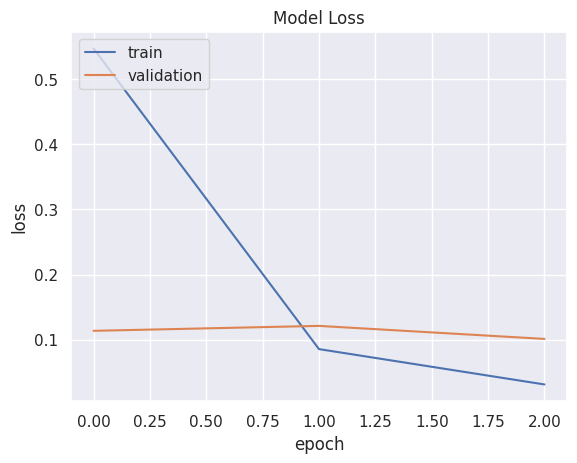

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

66/66 [==============================] - 90s 1s/step
              precision    recall  f1-score   support

      Arabic       0.99      1.00      1.00       110
     Bengali       1.00      1.00      1.00        14
      Danish       0.91      0.91      0.91        82
       Dutch       0.98      0.95      0.97       103
     English       0.97      0.98      0.98       286
      French       0.98      0.96      0.97       203
      German       1.00      0.99      0.99        89
       Greek       1.00      1.00      1.00        71
       Hindi       1.00      1.00      1.00        18
     Italian       0.98      0.99      0.98       138
     Kannada       1.00      1.00      1.00        76
   Malayalam       1.00      0.99      1.00       122
  Portugeese       0.98      0.92      0.95       137
     Russian       1.00      1.00      1.00       143
     Spanish       0.93      0.95      0.94       175
    Sweedish       0.94      0.96      0.95       140
       Tamil       1.00     

array([[110,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,  75,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   6,   0,   1],
       [  0,   0,   1,  98,   2,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0],
       [  0,   0,   0,   0, 281,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   1,   2,   0,   1],
       [  0,   0,   0,   0,   3, 195,   0,   0,   0,   1,   0,   0,   0,
          0,   3,   0,   0,   1],
       [  0,   0,   1,   0,   0,   0,  88,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  71,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  18,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['Arabic',
 'Bengali',
 'Danish',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Hindi',
 'Italian',
 'Kannada',
 'Malayalam',
 'Portugeese',
 'Russian',
 'Spanish',
 'Sweedish',
 'Tamil',
 'Turkish']

In [ ]:
message = "Taylor Swift's upcoming album release and her collaborations with other prominent artists would be the focus of the entertainment news story. The article would likely include details about the album, the release date, and the artists she's collaborating with, generating excitement among her fans and the wider entertainment industry."
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

predicted: English
